In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import time
import os

import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw
import face_recognition

from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

/home/hermit/anaconda3/envs/my_env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def faceFromImage(img):
    pixels = np.asarray(img)
    face = pixels[y:y+h, x:x+w]
    image =Image.fromarray(face)
    size = (160,160)
    image = image.resize(size)
    face_array = np.asarray(image)
    pixels = face_array
    return pixels

def getImage(fname):
    image = cv.imread(fname)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    gray = cv.imread(fname, 0)
    
    faces = face_cascade.detectMultiScale(gray, 1.6, 8)
    return faceFromImage(gray)
    
def getFaces(folder):
    faces = []
    for fname in os.listdir(folder):
        path = folder + fname
        face = getImage(path)
        faces.append(face)
    return faces

def getData(folder):
    facesList, labelsList = list(), list()
    for subfolder in os.listdir(folder):
        path = folder + subfolder + '/'
        faces = getFaces(path)
        labels = [subfolder for i in range(len(faces))]
        print('loaded %d sample for class: %s' % (len(faces),subfolder))
        facesList.extend(faces)
        labelsList.extend(labels)
    return np.asarray(facesList), np.asarray(labelsList)

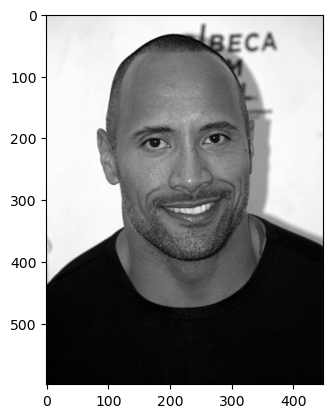

In [3]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

base_image = cv.imread('14-celebrity-faces-dataset/data/train/dwayne_johnson/449px-Dwayne_Johnson_at_the_2009_Tribeca_Film_Festival.jpg')
gray = cv.cvtColor(base_image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

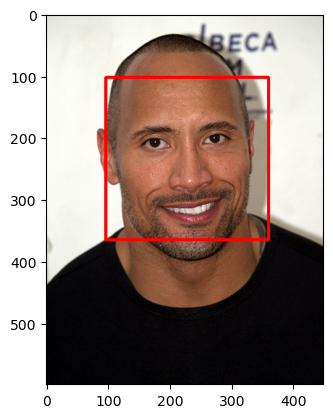

In [4]:
face = face_cascade.detectMultiScale(gray, 1.1, 5)
for (x,y,w,h) in face:
     cv.rectangle(base_image,(x,y),(x+w,y+h),(0,0,255),3)
plt.imshow(cv.cvtColor(base_image, cv.COLOR_BGR2RGB))

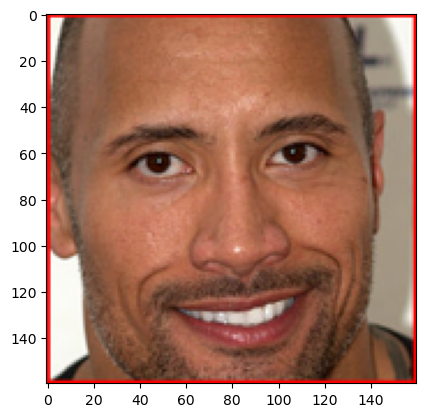

In [5]:
plt.imshow(faceFromImage(cv.cvtColor(base_image, cv.COLOR_BGR2RGB)))

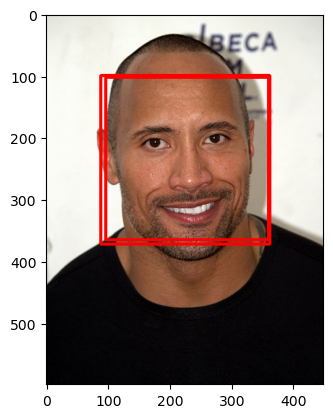

In [6]:
face = face_cascade.detectMultiScale(gray, 1.5, 7)
for (x,y,w,h) in face:
     cv.rectangle(base_image,(x,y),(x+w,y+h),(0,0,255),3)
plt.imshow(cv.cvtColor(base_image, cv.COLOR_BGR2RGB))

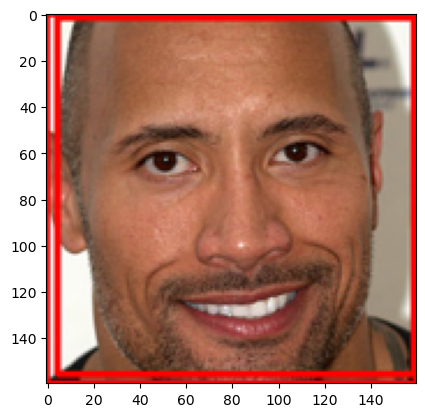

In [7]:
plt.imshow(faceFromImage(cv.cvtColor(base_image, cv.COLOR_BGR2RGB)))

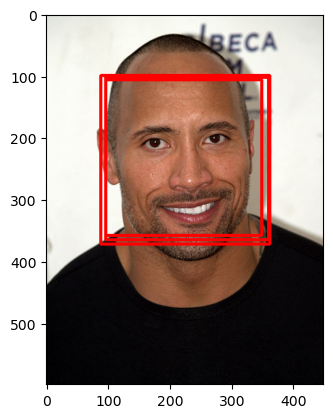

In [8]:
face = face_cascade.detectMultiScale(gray, 1.6, 8)
for (x,y,w,h) in face:
     cv.rectangle(base_image,(x,y),(x+w,y+h),(0,0,255),3)
plt.imshow(cv.cvtColor(base_image, cv.COLOR_BGR2RGB))

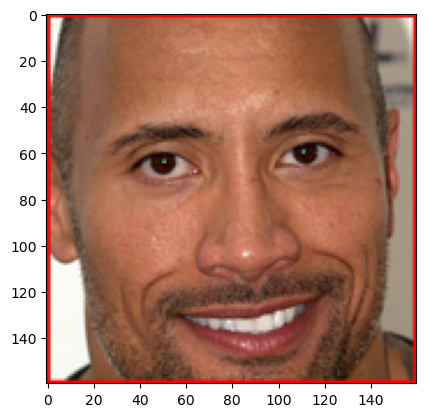

In [9]:
plt.imshow(faceFromImage(cv.cvtColor(base_image, cv.COLOR_BGR2RGB)))

In [10]:
trainX, trainY = getData('/home/hermit/Документы/IASA-CV-course/lab_5/14-celebrity-faces-dataset/data/train/')
print(trainX.shape, trainY.shape)

testX, testY = getData('/home/hermit/Документы/IASA-CV-course/lab_5/14-celebrity-faces-dataset/data/val/')
print(testX.shape, testY.shape)

loaded 10 sample for class: sofia_vergara
loaded 10 sample for class: kate_beckinsale
loaded 10 sample for class: anne_hathaway
loaded 10 sample for class: simon_pegg
loaded 10 sample for class: arnold_schwarzenegger
loaded 10 sample for class: will_smith
loaded 10 sample for class: lauren_cohan
loaded 10 sample for class: dwayne_johnson
(80, 160, 160) (80,)
loaded 5 sample for class: sofia_vergara
loaded 5 sample for class: kate_beckinsale
loaded 5 sample for class: anne_hathaway
loaded 5 sample for class: simon_pegg
loaded 5 sample for class: arnold_schwarzenegger
loaded 5 sample for class: will_smith
loaded 5 sample for class: lauren_cohan
loaded 5 sample for class: dwayne_johnson
(40, 160, 160) (40,)


In [11]:
np.savez_compressed('dataset.npz', trainX, trainY, testX, testY)
data = np.load('dataset.npz', allow_pickle=True)
x_train, y_train, x_test, y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded:', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Loaded: (80, 160, 160) (80,) (40, 160, 160) (40,)


In [12]:
samples, x, y = x_train.shape
xTrain = x_train.reshape(samples, x*y)

samples, x, y = x_test.shape
xTest = x_test.reshape(samples, x*y)

In [13]:
start_time = time.time()

model = RandomForestClassifier()
model.fit(xTrain, y_train)

print('RandomForestClassifier work time:')
period = time.time()-start_time
print(period)
worktime = np.append(period, [])

RandomForestClassifier work time:
0.6875689029693604


In [14]:
y_pred = model.predict(xTest)
print(y_pred)

['anne_hathaway' 'anne_hathaway' 'anne_hathaway' 'sofia_vergara'
 'simon_pegg' 'simon_pegg' 'lauren_cohan' 'simon_pegg' 'anne_hathaway'
 'simon_pegg' 'anne_hathaway' 'anne_hathaway' 'sofia_vergara'
 'anne_hathaway' 'simon_pegg' 'simon_pegg' 'sofia_vergara' 'sofia_vergara'
 'simon_pegg' 'arnold_schwarzenegger' 'sofia_vergara' 'lauren_cohan'
 'arnold_schwarzenegger' 'anne_hathaway' 'arnold_schwarzenegger'
 'kate_beckinsale' 'sofia_vergara' 'dwayne_johnson' 'simon_pegg'
 'will_smith' 'sofia_vergara' 'lauren_cohan' 'sofia_vergara'
 'dwayne_johnson' 'sofia_vergara' 'dwayne_johnson' 'anne_hathaway'
 'simon_pegg' 'arnold_schwarzenegger' 'lauren_cohan']


In [15]:
print(classification_report(y_pred, y_test))

                       precision    recall  f1-score   support

        anne_hathaway       0.60      0.33      0.43         9
arnold_schwarzenegger       0.40      0.50      0.44         4
       dwayne_johnson       0.20      0.33      0.25         3
      kate_beckinsale       0.00      0.00      0.00         1
         lauren_cohan       0.20      0.25      0.22         4
           simon_pegg       0.40      0.22      0.29         9
        sofia_vergara       0.20      0.11      0.14         9
           will_smith       0.20      1.00      0.33         1

             accuracy                           0.28        40
            macro avg       0.28      0.34      0.26        40
         weighted avg       0.35      0.28      0.29        40



In [16]:
start_time = time.time()

modelSVC = SVC(kernel='linear')
modelSVC.fit(xTrain, y_train)

print('SVM work time:')
period = time.time()-start_time
print(period)
worktime = np.append(worktime, [period])

SVM work time:
0.1071770191192627


In [17]:
y_pred = modelSVC.predict(xTest)
print(y_pred)

['anne_hathaway' 'anne_hathaway' 'sofia_vergara' 'simon_pegg' 'simon_pegg'
 'will_smith' 'will_smith' 'dwayne_johnson' 'arnold_schwarzenegger'
 'will_smith' 'kate_beckinsale' 'kate_beckinsale' 'sofia_vergara'
 'lauren_cohan' 'dwayne_johnson' 'sofia_vergara' 'simon_pegg'
 'dwayne_johnson' 'simon_pegg' 'lauren_cohan' 'sofia_vergara' 'simon_pegg'
 'lauren_cohan' 'lauren_cohan' 'dwayne_johnson' 'kate_beckinsale'
 'dwayne_johnson' 'dwayne_johnson' 'will_smith' 'will_smith' 'simon_pegg'
 'lauren_cohan' 'simon_pegg' 'dwayne_johnson' 'arnold_schwarzenegger'
 'simon_pegg' 'anne_hathaway' 'simon_pegg' 'arnold_schwarzenegger'
 'dwayne_johnson']


In [18]:
print(classification_report(y_pred, y_test))

                       precision    recall  f1-score   support

        anne_hathaway       0.00      0.00      0.00         3
arnold_schwarzenegger       0.00      0.00      0.00         3
       dwayne_johnson       0.20      0.12      0.15         8
      kate_beckinsale       0.00      0.00      0.00         3
         lauren_cohan       0.20      0.20      0.20         5
           simon_pegg       0.40      0.22      0.29         9
        sofia_vergara       0.20      0.25      0.22         4
           will_smith       0.40      0.40      0.40         5

             accuracy                           0.17        40
            macro avg       0.18      0.15      0.16        40
         weighted avg       0.23      0.17      0.19        40



In [19]:
start_time = time.time()

modelMLP = MLPClassifier(max_iter=100)
modelMLP.fit(xTrain, y_train)

print('MLP work time:')
period = time.time()-start_time
print(period)
worktime = np.append(worktime, [period])

MLP work time:
1.5608923435211182


In [20]:
y_pred = modelMLP.predict(xTest)
print(y_pred)

['kate_beckinsale' 'arnold_schwarzenegger' 'arnold_schwarzenegger'
 'arnold_schwarzenegger' 'arnold_schwarzenegger' 'arnold_schwarzenegger'
 'arnold_schwarzenegger' 'arnold_schwarzenegger' 'arnold_schwarzenegger'
 'arnold_schwarzenegger' 'kate_beckinsale' 'kate_beckinsale'
 'kate_beckinsale' 'kate_beckinsale' 'kate_beckinsale'
 'arnold_schwarzenegger' 'arnold_schwarzenegger' 'arnold_schwarzenegger'
 'arnold_schwarzenegger' 'arnold_schwarzenegger' 'arnold_schwarzenegger'
 'arnold_schwarzenegger' 'arnold_schwarzenegger' 'arnold_schwarzenegger'
 'arnold_schwarzenegger' 'kate_beckinsale' 'arnold_schwarzenegger'
 'kate_beckinsale' 'kate_beckinsale' 'arnold_schwarzenegger'
 'arnold_schwarzenegger' 'arnold_schwarzenegger' 'arnold_schwarzenegger'
 'kate_beckinsale' 'kate_beckinsale' 'arnold_schwarzenegger'
 'kate_beckinsale' 'arnold_schwarzenegger' 'arnold_schwarzenegger'
 'kate_beckinsale']


In [21]:
print(classification_report(y_pred, y_test))

                       precision    recall  f1-score   support

        anne_hathaway       0.00      0.00      0.00         0
arnold_schwarzenegger       1.00      0.19      0.31        27
       dwayne_johnson       0.00      0.00      0.00         0
      kate_beckinsale       0.00      0.00      0.00        13
         lauren_cohan       0.00      0.00      0.00         0
           simon_pegg       0.00      0.00      0.00         0
        sofia_vergara       0.00      0.00      0.00         0
           will_smith       0.00      0.00      0.00         0

             accuracy                           0.12        40
            macro avg       0.12      0.02      0.04        40
         weighted avg       0.68      0.12      0.21        40



In [22]:
modelXGB = XGBClassifier()
modelXGB.fit(xTrain, y_train)

print('XGB work time:')
period = time.time()-start_time
print(period)
worktime = np.append(worktime, [period])

[20:11:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB work time:
19.60619568824768


In [23]:
y_pred = modelXGB.predict(xTest)
print(y_pred)

['anne_hathaway' 'anne_hathaway' 'anne_hathaway' 'simon_pegg' 'simon_pegg'
 'arnold_schwarzenegger' 'kate_beckinsale' 'dwayne_johnson' 'lauren_cohan'
 'simon_pegg' 'anne_hathaway' 'anne_hathaway' 'sofia_vergara'
 'anne_hathaway' 'kate_beckinsale' 'dwayne_johnson' 'simon_pegg'
 'simon_pegg' 'simon_pegg' 'lauren_cohan' 'sofia_vergara' 'lauren_cohan'
 'arnold_schwarzenegger' 'anne_hathaway' 'lauren_cohan' 'will_smith'
 'dwayne_johnson' 'dwayne_johnson' 'simon_pegg' 'will_smith' 'will_smith'
 'lauren_cohan' 'will_smith' 'dwayne_johnson' 'anne_hathaway'
 'dwayne_johnson' 'anne_hathaway' 'simon_pegg' 'lauren_cohan'
 'kate_beckinsale']


In [24]:
print(classification_report(y_pred, y_test))

                       precision    recall  f1-score   support

        anne_hathaway       0.60      0.33      0.43         9
arnold_schwarzenegger       0.20      0.50      0.29         2
       dwayne_johnson       0.20      0.17      0.18         6
      kate_beckinsale       0.20      0.33      0.25         3
         lauren_cohan       0.20      0.17      0.18         6
           simon_pegg       0.60      0.38      0.46         8
        sofia_vergara       0.00      0.00      0.00         2
           will_smith       0.40      0.50      0.44         4

             accuracy                           0.30        40
            macro avg       0.30      0.30      0.28        40
         weighted avg       0.38      0.30      0.32        40



1


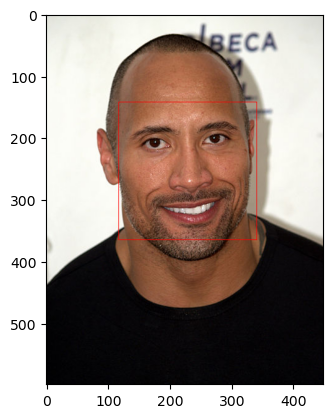

In [25]:
image = cv.imread('14-celebrity-faces-dataset/data/train/dwayne_johnson/449px-Dwayne_Johnson_at_the_2009_Tribeca_Film_Festival.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
face_locations = face_recognition.face_locations(image)
no_of_faces = len(face_locations)
print(no_of_faces)
pil_image = Image.fromarray(image)
for face_location in face_locations:
    top,right,bottom,left = face_location
    draw_shape = ImageDraw.Draw(pil_image)
    draw_shape.rectangle([left, top, right, bottom],outline="red")
#display and save the image
pil_image.save('/home/hermit/Документы/IASA-CV-course/lab_5/testHOG.png')
test_image = cv.imread('testHOG.png')
plt.imshow(cv.cvtColor(test_image, cv.COLOR_BGR2RGB))

# Висновок

In [26]:
results = pd.DataFrame({'Work Time': worktime},
                       index=['RandomForest', 'SVM', 'MLP', 'XGBoost'])
results

,Work Time
RandomForest,0.687569
SVM,0.107177
MLP,1.560892
XGBoost,19.606196


В даній лабораторній роботі були розглянуті класичні методи розпізнавання облич на зображеннях. Проведено порівняльний аналіз різних алгоритмів локалізації обличчя на зображенні для подальшого розпізнавання.

В ході даної роботи було створено вибірку на основі вибірки з датасету 14-celebrity-faces-dataset: https://www.kaggle.com/datasets/danupnelson/14-celebrity-faces-dataset. Можна знайти різні фотографії 14 знаменитостей. В моїй роботі я дещо змінив стосовно набору даних, видалив певних зірок і зробив однакову кількість фотографій для кожної персони. В результаті вийшло по 10 фото на 8 осіб в навчальній вибірці (всього 80 зображень), і по 5 фото на 8 осіб в тестовій вибірці (всього 40 зображень). Серед знаменитостей обрано: Anne Hathaway, Arnold Schwarzenegger, Dwayne Johnson, Kate Beckinsale, Lauren Cohan, Simon Pegg, Sofia Vergara, Will Smith.

В роботі застосовано метод Віоли-Джонса для виділення областей, що містять обличчя для різних параметрів minNeighbors, scaleFactor:
* *minNeighbors=1.1, scaleFactor=5* 
* *minNeighbors=1.5, scaleFactor=7* 
* *minNeighbors=1.6, scaleFactor=8*

Розглянуто алгоритми RandomForestClassifier, SVM, MPLClassifier та XGBClassifier для розпізнавання обличчя знаменитостей. Визначено час роботи цих алгоритмів, результати зведено в таблицю вище.

Визначено метрики precision, recall, f1-score, support для всіх алгоритмів. Результати наведено в таблицях вище.

Застосовано НOG детектор для виділення обличчя.

Відповіді на питання:

1. **Який з алгоритмів знаходження обличчя спрацював краще за інший? Чому?** 

На мою думку, найкраще спрацював алгоритм знаходження обличчя на основі метода HOG. HOG надійний для виявлення об’єктів, оскільки форма об’єкта характеризується за допомогою локального розподілу градієнта інтенсивності та напрямку країв. Це можна пояснити ще тим, що розглядалась фотографія фактично з фронтальним обличчям. В іншому випадку результат був би гіршим для цього алгоритму. Хороший результат показує метод Віоли-Джонса з параметрами *minNeighbors=1.6, scaleFactor=8*. Це пояснюється тим, що збільшення цих параметрів дозволяє більш коректно виділити та обробити елементи-пікселі зображення, що збільшує якість виділення обличчя.

2. **Який з алгоритмів розпізнавання обличчя виявився краще за інший?**

Найкращим алгоритмом для розпізнавання з точки зору метрики precision, recall, f1-score, support виявився алгоритм на основі метода XGBoost. Трохи гірші результати в RandomForestClassifier, в SVM. Найгрішим виявився MLPClassifier.

3. **Який з варіантів швидше відпрацював?**

Найшвидше відпрацював алгоритм SVM.